In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
from numpy import cos, sin
%matplotlib inline

from nsmod.one_component_model_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 1.3416407865e+14
DeltaPhi_49 : 1.7282234048e-03
DeltaPhi_49_SpindownTorque : 2.1429943053e-05
DeltaPhi_63 : 9.6415683037e-02
DeltaPhi_75 : 6.9743522609e-02
EMtorqueAmplificationfactor : 1.7526599899e+02
P : 1.0005072145e-03
T : 6.6000000000e+02
a0 : 4.0000000000e+00
beta : -1.3980464815e-03
chi0 : 8.8600000000e+01
delta_omega_dot0_EM : 4.3798229347e-03
delta_omega_dot0_FP : 1.6822421184e-06
delta_omega_dot0_FP_EM : 9.3850437638e-05
epsA : 5.0000000000e-09
epsI1 : 0.0000000000e+00
epsI3 : 5.0000000000e-06
n : 1.0000000000e+05
nu_dot0 : -4.3772084811e-03
omega0 : 6.2800000000e+03
omega_dot0 : -2.7502812015e-02
source_script : one-component-model-with-Euler
tauA : 2.0010144290e+05
tauE : 2.2834028741e+05
tauP : 2.0010144290e+02
tauS : 2.2820398393e+05
wobble_angle : 7.0714428394e-02
wobble_angle_spindown : 8.7685780047e-04
BETA FUNCTION IS USED
BETA FUNCTION IS USED


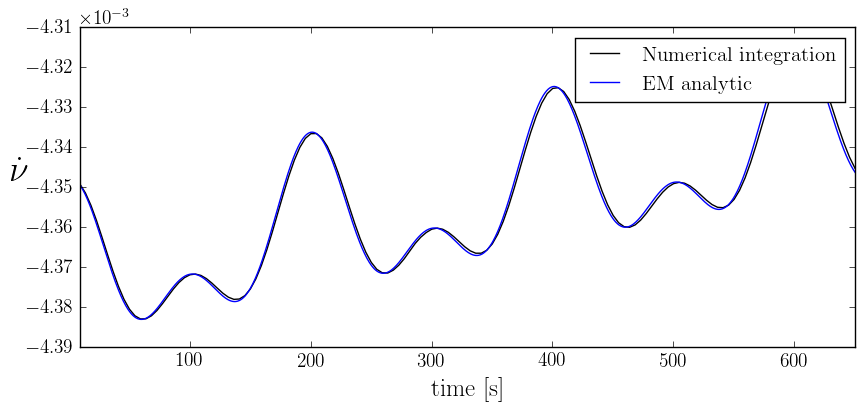

In [17]:
def SignalModel_EM(theta1, t):
    omega0, epsI, a0, chi, epsA = theta1
    
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    
    omega = omega0 - k * omega0**3 * t * sin(chi)**2
    psi = -epsI * omega0 * t + 0.5 * k * epsI * omega0**3  * t**2 * sin(chi)**2+ np.pi/2
    
    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = omega 
    
    theta = a0
    psidot = epsI * omega0 #+ k * omega0**3 * epsI * t
    
    GEOMETRIC = psidot**2 * ((2*sin(chi)**3*sin(psi)*sin(theta)*cos(theta) - 
                              sin(chi)**2*sin(psi)**2*sin(theta)**2*cos(chi) - 
                              2*sin(chi)**2*sin(theta)**2*cos(chi) + 
                              sin(chi)**2*cos(chi) - sin(theta)**2*cos(chi)**3
                             )*sin(chi)*sin(theta)*cos(psi)/(
                            (sin(chi)*sin(psi)*cos(theta) - sin(theta)*cos(chi))**2 + 
                             sin(chi)**2*cos(psi)**2)**2
                            )/ (2*np.pi)
    
    return  -k * Phidot**3 * Sin2Theta / (2*np.pi) #+ GEOMETRIC

fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameter3
epsI3 = 5e-6
omega0 = 2*np.pi*1000
epsA = 5e-9
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3.3* tauP
a0 = 4.0

n = 100000
error = 1e-13

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, 
                 cleanup=False, 
                 #DryRun=True, 
                 AnomTorque=True)

File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=11, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM(theta_EM, time), color="b", label="EM analytic")

plt.legend()
plt.show()